In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This sets all the initial variables

In [2]:
df = pd.read_parquet('BOQ_data.parquet')
start = min(df['DATE'])
names = ['DATE','E2P', 'EPS','LME','LME_ind','PERMNO','Q','RET','ROC','S2P','VOL','beta','cum_return_6_2','d_ceq','investment','lev','pcm','pm_adj','prof','roic','s2invt','sale','sale_ind','sales_g','sga2s','spread_mean','std_vol','suv']
dates = df['DATE'].unique()
data = {}
first_day = df[df['DATE']==start]
first = first_day['PERMNO'].values
vals = first_day.values
dates = sorted(dates)

In [48]:
data = {}

BIG LOOP

In [49]:
currAccValue = 0
AccValues = []
positions = {}
Pnl = []
# perm: num of stocks bought
cash = 10000
for date in dates:
    buy = []
    hold = []
    sell = []
    currMonthData = df[df['DATE'] == date]
    for perm in currMonthData.values:
        name = f'{perm[18]}'
        price = perm[19]
        if data.get(name):
            curr = data[name]
            curr['price'].append(price)
            curr['month change'] = price/curr['price'][-2] -1
            if len(curr['price']) > 3:
                curr['3month change'] = price/curr['price'][-4] - 1
                if len(curr['price']) > 6:
                    curr['6month change'] = price/curr['price'][-7] - 1
            if curr['month change'] <0:
                buy.append(name)
            elif curr['month change'] >0 and positions.get(name):
                sell.append(name)
        else:
            data[name] = {'price':[price]}
    for per in sell:
        if not np.isnan(data[per]['price'][-1]):
            sold = positions.pop(per)
            cash += data[per]['price'][-1]*sold
    for per in buy:
        if cash > data[per]['price'][-1] and not np.isnan(data[per]['price'][-1]) :
            if positions.get(per):
                positions[per] += 1
            else:
                positions[per] = 1
            cash -= data[per]['price'][-1]
    currAccValue = 0
    for key,val in positions.items():
        if not np.isnan(data[key]['price'][-1]):
            currAccValue += data[key]['price'][-1]*val 
        else:
            x = 2
            while x<len(data[key]['price']):
                if not np.isnan(data[key]['price'][-x]):
                    currAccValue += data[key]['price'][-x]*val
                    break
                else:
                    x+=1
    currAccValue +=cash
    AccValues.append(currAccValue)
    Pnl.append(currAccValue-10000)

get the column index for a identifier

In [ ]:
cols = df.columns.values
inp = input(f'{cols}   which name?')
def get_index(name):
    count = 0
    it = iter(cols)
    while name!=next(it):
        count+=1
        if count == 86:
            break
    return count
print(get_index(inp))

In [59]:
returns = np.diff(AccValues) / AccValues[:-1]
mean_return = np.mean(returns)
std_dev = np.std(returns)
sharpe_ratio = (mean_return - 0.03 / 12) / std_dev
sharpe_ratio

0.043406351085186076

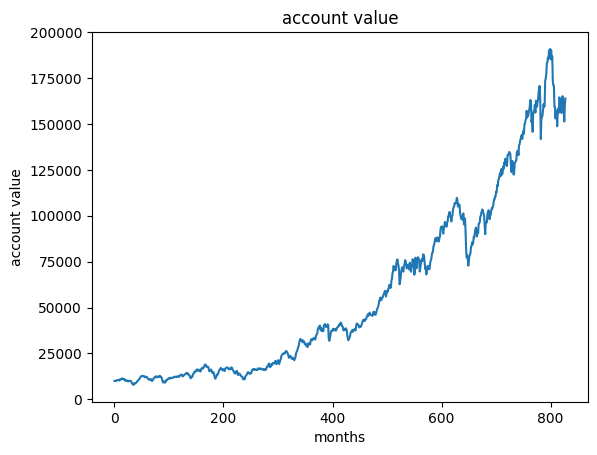

22.298911339127578

In [58]:
plt.plot(np.arange(len(AccValues)),AccValues)
plt.xlabel('months')
plt.ylabel('account value')
plt.title('account value')
plt.show()
(currAccValue/10000 -1)*100/len(AccValues)*12